In [1]:
import numpy as np
import os
#from struct import unpack

from scipy import signal

#import pickle

#import matplotlib.pyplot as plt

import UDIP_Lib_V19 as UDIP_Lib  #making updating UDIP_Lib easier

import RockSat_1_14_fitting_functions as R_fitting

import json

import matplotlib.pyplot as plt

In [2]:
"""
Created on November 29, 2023

@author: Jarod Dagney
"""

import numpy as np
import os
#from struct import unpack

from scipy import signal

#import pickle

#import matplotlib.pyplot as plt

import UDIP_Lib_V19 as UDIP_Lib  #making updating UDIP_Lib easier

import RockSat_1_14_fitting_functions as R_fitting

import json

#from datetime import datetime

from RockSat_json import *


In [3]:
packets = import_data('2021_packet.json')
first_sweep = packets['packets']['Medium']['0']
print(first_sweep.keys())

FileNotFoundError: [Errno 2] No such file or directory: '2021_packet.json'

In [ ]:
type(packets['packets']['Burst']['0'])

dict

In [ ]:
print(np.linspace(0,1, 5))

[0.   0.25 0.5  0.75 1.  ]


In [ ]:
print(int(len(first_sweep['Voltage'])/2))

132


In [ ]:
sec = np.linspace(0, 1, 5)
print(sec[1])

0.25


In [ ]:
print(first_sweep['Voltage'])

[0.35215727577527645, 0.4490706134617284, 0.48008288152139755, 0.6021936870063271, 0.7165514254763323, 0.7746994280881978, 0.8599831652522809, 0.9510817026775484, 1.0441185068565346, 1.1080813097295916, 1.2088711809235022, 1.3038462518562213, 1.4104509233113163, 1.4918581269679336, 1.637228133497608, 1.701190936370665, 1.8116721413332186, 1.7961660073033912, 1.9764248154001862, 2.0365110847657917, 2.096597354131383, 2.214831626108854, 2.2535969611834332, 2.426102702265311, 2.5811640425636355, 2.59667017659347, 2.672262579988896, 2.819570853272296, 2.811817786257386, 3.0056444616302898, 3.0095209951377413, 3.1277552671152122, 3.1587675351748814, 3.331273276256759, 3.4243100804357525, 3.4999024838311854, 3.600692355025089, 3.7751363628606995, 3.804210364166636, 3.844913965994941, 3.9263211696515654, 4.058123308905131, 4.100765177487176, 4.257764784539226, 4.292653586106347, 4.498109862001627, 4.482603727971785, 4.608591066964173, 4.697751337635701, 4.8528126779340255, 4.8314917436430065,

In [ ]:
def get_sweep(sw, cn = 1):

  sec = np.linspace(0, 1, 5)

  start = sw['Start']
  stop =  sw['Stop']

  sw['Voltage'] = np.array(sw['Voltage'])
  sw[f'Current{cn}'] = np.array(sw[f'Current{cn}'])

  V1 = sw['Voltage']     [0: int(sec[1] * len(sw['Voltage' ]))]
  I1 = sw[f'Current{cn}'][0: int(sec[1] * len(sw[f'Current1']))]

  V2 = sw['Voltage']     [int(sec[1]*len(sw['Voltage' ]))      :int(sec[2]*len(sw['Current1'])) ]
  I2 = sw[f'Current{cn}'][int(sec[1]*len(sw[f'Current{cn}']))  :int(sec[2]*len(sw['Current1'])) ]

  V3 = sw['Voltage']     [int(sec[2]*len(sw['Voltage' ]))      :int(sec[3]*len(sw['Current1'])) ]
  I3 = sw[f'Current{cn}'][int(sec[2]*len(sw[f'Current{cn}']))  :int(sec[3]*len(sw['Current1'])) ] 

  V4 = sw['Voltage']     [int(sec[3]*len(sw['Voltage' ]))      :int(sec[4]*len(sw['Current1'])) ]
  I4 = sw[f'Current{cn}'][int(sec[3]*len(sw[f'Current{cn}']))  :int(sec[4]*len(sw['Current1'])) ]

  Vf = sw['Voltage']     [int(sec[1]*len(sw['Voltage' ]))      :int(sec[3]*len(sw['Current1'])) ]
  If = sw[f'Current{cn}'][int(sec[1]*len(sw[f'Current{cn}']))  :int(sec[3]*len(sw['Current1'])) ]
  return start, stop, V1, I1, V2, I2, V3, I3, V4, I4

In [ ]:
sw_range = np.arange(0,int(len(packets['packets']['Medium'])), 100)

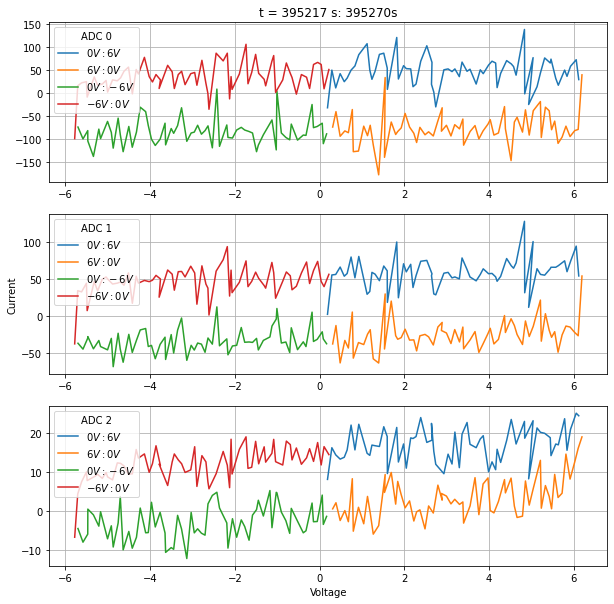

In [ ]:
cn = 0
fig, axs = plt.subplots(3, 1, figsize=(10, 10))
for i in sw_range:
  for axnum in np.arange(len(axs)):
    axs[axnum].clear()
    cn = axnum
    start, stop, V1, I1, V2, I2, V3, I3, V4, I4 = get_sweep(packets['packets']['Medium'][f'{i}'], cn = cn)

    axs[axnum].plot(V1, I1 , label = r'$ 0V : 6V$')
    axs[axnum].plot(V2, I2 , label = r'$ 6V:  0V$')
    axs[axnum].plot(V3, I3 , label = r'$ 0V: -6V$')
    axs[axnum].plot(V4, I4 , label = r'$-6V : 0V$')
    axs[axnum].legend(title = f'ADC {cn}', loc = 'upper left')
    axs[axnum].grid()
  axs[0].set_title(f't = {start} s: {stop}s')
  axs[2].set_xlabel('Voltage')
  axs[1].set_ylabel('Current')
  # plt.savefig(f'Sweeps/sw_{i}.jpg' ,dpi = 400)
  